In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

### Crime Score Version

In [2]:
# crime1 = pd.read_csv("safety_score.csv")# 1st version
# crime2 = pd.read_csv("safety_score_LA_old.csv") # 2nd version
crime3 = pd.read_csv("safety_score_AU.csv") # 3rd version

In [3]:
crime3.head()

,Unnamed: 0,ZIP,score,pop,score/population,log,level,level2
0,0,78613.0,11175,75279,0.148448,-1.907522,3,1
1,1,78617.0,10235,26126,0.391755,-0.937118,3,1
2,2,78652.0,570,4919,0.115877,-2.155224,3,1
3,3,78653.0,1490,19328,0.077090,-2.562779,3,1
4,4,78660.0,5815,81698,0.071177,-2.642589,3,1


In [4]:
crime3.level2.unique()

array([1, 3, 2])

In [5]:
crime3[crime3.level2.isna()]

,Unnamed: 0,ZIP,score,pop,score/population,log,level,level2


In [6]:
crime = crime3
crime = crime[['ZIP','level2']]
crime.columns = ['zipcode', 'cat_score']

In [7]:
crime['cat_score'].value_counts()

1    16
3    15
2    15
Name: cat_score, dtype: int64

In [8]:
crime.shape

(46, 2)

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
zipcode      46 non-null float64
cat_score    46 non-null int64
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes


In [10]:
crime['cat_score'].unique()

array([1, 3, 2])

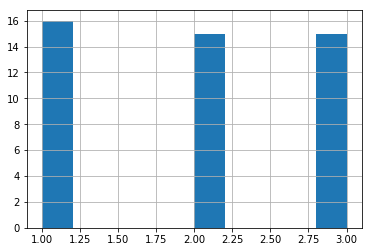

In [11]:
crime['cat_score'].hist()

### Merge cleaned listings data and safety score based on zipcode

In [12]:
listing_zip = pd.read_csv("listings_au_cleaned_zipcode.csv")
#crime = pd.read_csv("safety_score_LA.csv")
#crime = pd.read_csv("crime_score.csv")

In [13]:
listing_zip = listing_zip.set_index('zipcode')
listing_zip.head()

,host_total_listings_count,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,reviews_per_month,...,wordperrev,count,good_y,safe_y,peaceful,night_y,walk_y,unsafe_y,bad_y,dangerous_y
zipcode,,,,,,,,,,,,,,,,,,,,,
78620,3.000000,1.000000,1.000000,3.000000,175.000000,23.000000,53.000000,83.000000,358.000000,0.240000,...,16.242631,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
78652,1.500000,1.750000,2.000000,3.000000,78.000000,20.500000,50.500000,77.500000,122.500000,1.755000,...,27.121995,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
78681,2.000000,1.500000,2.000000,2.500000,72.500000,25.500000,51.000000,70.500000,160.500000,1.180000,...,18.686851,40.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0
78701,57.073899,1.371855,1.410377,2.298742,319.784591,9.819182,25.528302,42.330189,150.443396,1.532343,...,90.199465,67.364130,0.008152,0.019022,0.010870,0.019022,0.725543,0.0,0.000000,0.0
78702,37.136102,1.638658,1.929712,2.780831,294.518850,10.025559,24.960383,40.812780,137.967412,1.691252,...,95.298597,61.395522,0.033582,0.041045,0.017724,0.056903,0.337687,0.0,0.001866,0.0


In [14]:
crime.head()

,zipcode,cat_score
0,78613.0,1
1,78617.0,1
2,78652.0,1
3,78653.0,1
4,78660.0,1


In [15]:
crime = crime.set_index('zipcode')
cla_data = listing_zip.join(crime, how ='inner')

In [16]:
cla_data.head()

,host_total_listings_count,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,reviews_per_month,...,count,good_y,safe_y,peaceful,night_y,walk_y,unsafe_y,bad_y,dangerous_y,cat_score
zipcode,,,,,,,,,,,,,,,,,,,,,
78652.0,1.500000,1.750000,2.000000,3.000000,78.000000,20.500000,50.500000,77.500000,122.500000,1.755000,...,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
78701.0,57.073899,1.371855,1.410377,2.298742,319.784591,9.819182,25.528302,42.330189,150.443396,1.532343,...,67.364130,0.008152,0.019022,0.010870,0.019022,0.725543,0.000000,0.000000,0.0,3
78702.0,37.136102,1.638658,1.929712,2.780831,294.518850,10.025559,24.960383,40.812780,137.967412,1.691252,...,61.395522,0.033582,0.041045,0.017724,0.056903,0.337687,0.000000,0.001866,0.0,3
78703.0,8.292354,1.697151,1.992504,2.676162,481.053973,11.481259,26.575712,42.589205,147.967016,1.340075,...,57.995169,0.019324,0.096618,0.038647,0.041063,0.265700,0.000000,0.002415,0.0,2
78704.0,66.733087,1.505125,1.786388,2.298483,313.136531,10.015580,24.530135,40.071341,149.831488,1.331435,...,59.908053,0.032974,0.043120,0.015219,0.027901,0.361446,0.000634,0.000634,0.0,3


In [17]:
cla_data.isnull().sum()[cla_data.isnull().sum() != 0]

Series([], dtype: int64)

In [18]:
cla_data.shape

(41, 64)

In [19]:
corr_data = cla_data.loc[:, cla_data.columns != 'cat_score']

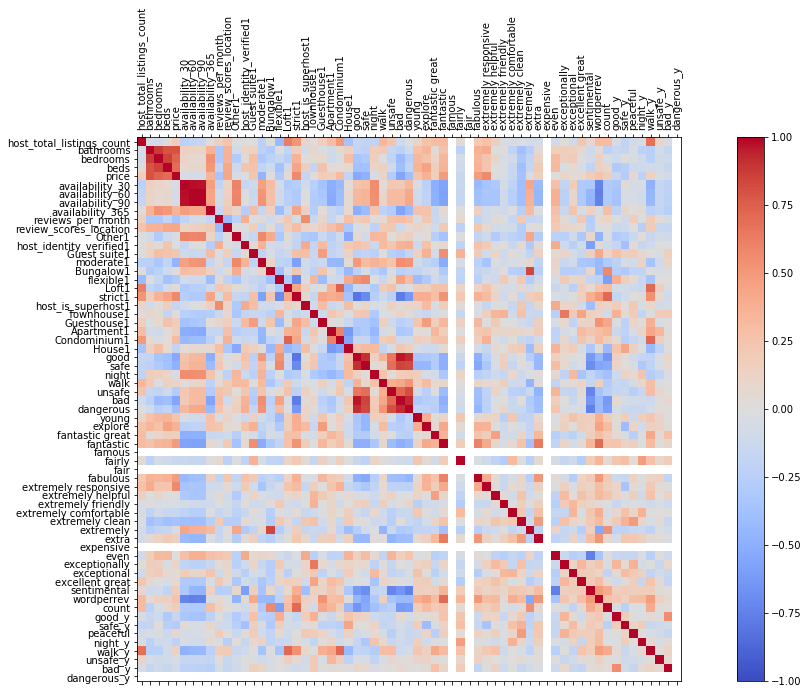

In [20]:
corr = corr_data.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_data.columns)
ax.set_yticklabels(corr_data.columns)
plt.show()

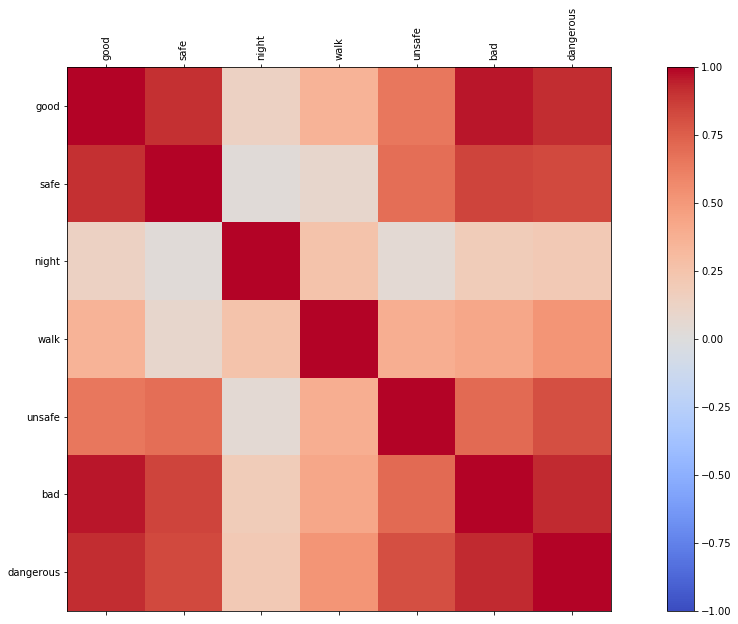

In [21]:
nlp_rev = ['good','safe','night','walk','unsafe','bad','dangerous']
corr_data = corr_data[nlp_rev]
corr = corr_data.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_data.columns)
ax.set_yticklabels(corr_data.columns)
plt.show()

In [22]:
cla_data.drop('bad', axis=1, inplace=True)
cla_data.drop('dangerous', axis=1, inplace=True)

In [23]:
cla_data.drop('safe', axis=1, inplace=True)

In [24]:
cla_data.drop('availability_30', axis=1, inplace=True)
cla_data.drop('availability_60', axis=1, inplace=True)
cla_data.drop('availability_365', axis=1, inplace=True)

In [25]:
cla_data.drop('bathrooms', axis=1, inplace=True)
cla_data.drop('bedrooms', axis=1, inplace=True)

In [26]:
cla_data.shape

(41, 56)

### Classfication

In [27]:
cla_data['cat_score'] = cla_data['cat_score'].astype(str)

In [28]:
def acc(Y_true, Y_pred):
    acc = round(sum(Y_pred == Y_true)/len(Y_true),2)
    return acc

In [29]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### Train, Test Data Split

In [31]:
Y = cla_data.reset_index(drop=True).iloc[::,-1]
X = cla_data.reset_index(drop=True).iloc[::,0:cla_data.shape[1]-1]

# X_tmp = X.copy()
# drop_l = ['Guesthouse0', 'Guesthouse1', 'Condominium0', 'Condominium1',
#        'Bungalow0', 'Bungalow1', 'Other0', 'Other1',
#        'Apartment0', 'Apartment1', 'Guest suite0', 'Guest suite1', 'House0',
#        'House1', 'Townhouse0', 'Townhouse1', 'Loft0', 'Loft1']
# for i in drop_l:
#     X_tmp.drop(i,axis=1, inplace=True)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 66)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(32, 55) (32,)
(9, 55) (9,)


In [33]:
## PCA
# from sklearn.decomposition import PCA
# pca = PCA(0.95)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

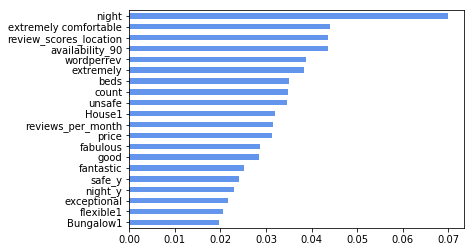

In [34]:
## random forest feature selection
rf_select = RandomForestClassifier(n_estimators = 100, max_features = 10, bootstrap = True, random_state = 45)
rf_select.fit(X_train, Y_train)

feat_importances = pd.Series(rf_select.feature_importances_, index=X_train.columns)
feat_20 = [feat_importances.index[i] for i in range(feat_importances.shape[0]) if feat_importances[i] > 0.02]
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',color='cornflowerblue')

In [35]:
from sklearn.feature_selection import SelectFromModel

slc = SelectFromModel(rf_select, threshold=0.02)
slc.fit(X_train, Y_train)
X_select_train = slc.transform(X_train)
X_select_test = slc.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_select_train, columns=feat_20)
X_test = pd.DataFrame(X_select_test, columns=feat_20)

#### Tuning Parameters

In [37]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## SVC
def svc_param_selection(X, y, nfolds):
    ks = ['rbf'] 
    Cs = [0.01, 0.1, 1, 10, 20, 50, 100]
    gammas = [0.0001, 0.001, 0.01, 0.1]
    param_grid = {'kernel': ks, 'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [38]:
svc_param_selection(X_train, Y_train, 5)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [39]:
## Random Forest
def rf_param_selection(X, y, nfolds):
    Ns = [10, 50, 100, 500, 1000]
    #Fs = [5, 10, 20, 35]
    Fs = [5, 10, 15]
    #Ls = [2, 5, 10]
    param_grid = {'n_estimators': Ns, 'max_features' : Fs} #'max_leaf_nodes': Ls
    grid_search = GridSearchCV(RandomForestClassifier(bootstrap = True, random_state = 45), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [40]:
rf_param_selection(X_train, Y_train, 5)

{'max_features': 5, 'n_estimators': 1000}

In [41]:
## Adaboost Classification
def ada_param_selection(X, y, nfolds):
    Ns = [10, 50, 100, 200, 500, 1000]
    LRts = [1, 10, 20, 50, 100]
    param_grid = {'n_estimators': Ns, 'learning_rate' : LRts}
    grid_search = GridSearchCV(AdaBoostClassifier(random_state = 45), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [42]:
ada_param_selection(X_train, Y_train, 5)

{'learning_rate': 10, 'n_estimators': 50}

In [43]:
## KNN Classification
def knn_param_selection(X, y, nfolds):
    Ns = [2, 3, 4, 5, 6, 7, 8, 10]
    param_grid = {'n_neighbors': Ns}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [44]:
knn_param_selection(X_train, Y_train, 5)

{'n_neighbors': 6}

In [45]:
## Decision Tree
def dt_param_selection(X, y, nfolds):
    #Fs = [5, 10, 20, 35]
    Fs = [5, 10, 15]
    param_grid = {'max_features': Fs}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=45), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [46]:
dt_param_selection(X_train, Y_train, 5)

{'max_features': 15}

#### Modeling

In [47]:
##Model List
log = LogisticRegression(penalty = 'l1', multi_class='multinomial', solver = 'saga') ##Logistic Regression
gnb = GaussianNB() ##Gaussian Naive Bayes
svc = SVC(kernel = 'rbf', C = 100, gamma = 0.0001) ##SVC
rf_class = RandomForestClassifier(n_estimators = 1000, max_features = 5, bootstrap = True, random_state = 45) ##Random Forest
adaboost_class = AdaBoostClassifier(n_estimators = 50, learning_rate = 10, random_state = 45) ##AdaBoost
knn_class = KNeighborsClassifier(n_neighbors = 6) ##knn
dt = DecisionTreeClassifier(max_features = 15, random_state=45)

In [48]:
def class_train(model,X_train,Y_train,X_val,Y_val):
    model.fit(X_train,Y_train)
    Y_pred_tr = model.predict(X_train)
    Y_pred_val = model.predict(X_val)
    return(acc(Y_train, Y_pred_tr), acc(Y_val,Y_pred_val))

#### Cross Validation

In [49]:
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=45)

log_train_acc, rf_train_acc, ada_train_acc, gnb_train_acc, svc_train_acc, linsvc_train_acc, knn_train_acc, xgb_train_acc, per_train_acc, sgd_train_acc, dt_train_acc = ([] for i in range(11))
log_val_acc, rf_val_acc, ada_val_acc, gnb_val_acc, svc_val_acc, linsvc_val_acc, knn_val_acc, xgb_val_acc, per_val_acc, sgd_val_acc, dt_val_acc = ([] for i in range(11))

#X_train_t = pd.DataFrame(X_train, columns = list("ab"))

for train_index, test_index in kf.split(X_train):
    X_train_k, X_val = X_train.iloc[train_index,], X_train.iloc[test_index]
    Y_train_k, Y_val = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    log_train_acc.append(class_train(log,X_train_k,Y_train_k,X_val,Y_val)[0])
    gnb_train_acc.append(class_train(gnb,X_train_k,Y_train_k,X_val,Y_val)[0])
    svc_train_acc.append(class_train(svc,X_train_k,Y_train_k,X_val,Y_val)[0])
    rf_train_acc.append(class_train(rf_class,X_train_k,Y_train_k,X_val,Y_val)[0])
    ada_train_acc.append(class_train(adaboost_class,X_train_k,Y_train_k,X_val,Y_val)[0])
    knn_train_acc.append(class_train(knn_class,X_train_k,Y_train_k,X_val,Y_val)[0])
    dt_train_acc.append(class_train(dt,X_train_k,Y_train_k,X_val,Y_val)[0])
    
    log_val_acc.append(class_train(log,X_train_k,Y_train_k,X_val,Y_val)[1])
    gnb_val_acc.append(class_train(gnb,X_train_k,Y_train_k,X_val,Y_val)[1])
    svc_val_acc.append(class_train(svc,X_train_k,Y_train_k,X_val,Y_val)[1])
    rf_val_acc.append(class_train(rf_class,X_train_k,Y_train_k,X_val,Y_val)[1])
    ada_val_acc.append(class_train(adaboost_class,X_train_k,Y_train_k,X_val,Y_val)[1])
    knn_val_acc.append(class_train(knn_class,X_train_k,Y_train_k,X_val,Y_val)[1])
    dt_val_acc.append(class_train(dt,X_train_k,Y_train_k,X_val,Y_val)[1])

In [50]:
#Logistic, NB, SVM, KNN, Random Forest

In [51]:
mod_name = ['Logistic Regression', 'Gaussian Naive Bayes', 'SVC', 'Random Forest', 'Adaboost',  'KNN', 'Decision Tree']
mod_list1 = [log_train_acc, gnb_train_acc, svc_train_acc, rf_train_acc, ada_train_acc, knn_train_acc, dt_train_acc]
mod_list2 = [log_val_acc, gnb_val_acc, svc_val_acc, rf_val_acc, ada_val_acc, knn_val_acc, dt_val_acc]
tr_acc_list = [np.mean(i) for i in mod_list1]
val_acc_list = [np.mean(i) for i in mod_list2]
tmp = {'Model': mod_name, 'Train_Accuracy': tr_acc_list, 'CV_Val_Accuracy': val_acc_list}
acc_df = pd.DataFrame(data=tmp)
acc_df

,Model,Train_Accuracy,CV_Val_Accuracy
0,Logistic Regression,0.5256,0.3164
1,Gaussian Naive Bayes,0.8104,0.4204
2,SVC,0.8928,0.3496
3,Random Forest,1.0000,0.5124
4,Adaboost,0.5420,0.4304
5,KNN,0.5732,0.2840
6,Decision Tree,1.0000,0.4188


In [52]:
log.fit(X_train, Y_train)
Y_pred_train = log.predict(X_train)
Y_pred_test = log.predict(X_test) 
print('Logistic Regression Training Accuracy:', acc(Y_train, Y_pred_train))
print('Logistic Regression Testing Accuracy:', acc(Y_test, Y_pred_test))

Logistic Regression Training Accuracy: 0.44
Logistic Regression Testing Accuracy: 0.33


In [53]:
gnb.fit(X_train, Y_train)
Y_pred_train = gnb.predict(X_train)
Y_pred_test = gnb.predict(X_test) 
print('Navie Bayes Training Accuracy:', acc(Y_train, Y_pred_train))
print('Navie Bayes Testing Accuracy:', acc(Y_test, Y_pred_test))

Navie Bayes Training Accuracy: 0.78
Navie Bayes Testing Accuracy: 0.56


In [54]:
##SVC has the least validation mean squared error
svc.fit(X_train, Y_train)
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test) 
print('SVC Training Accuracy:', acc(Y_train, Y_pred_train))
print('SVC Testing Accuracy:', acc(Y_test, Y_pred_test))

SVC Training Accuracy: 0.84
SVC Testing Accuracy: 0.56


In [55]:
rf_class.fit(X_train, Y_train)
Y_pred_train = rf_class.predict(X_train)
Y_pred_test = rf_class.predict(X_test) 
print('Random Forest Training Accuracy:', acc(Y_train, Y_pred_train))
print('Random Forest Testing Accuracy:', acc(Y_test, Y_pred_test))

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.44


In [56]:
rf_class.feature_importances_

array([0.06182102, 0.02918025, 0.08191327, 0.06543323, 0.05913642,
       0.03683792, 0.05738625, 0.0398685 , 0.08730591, 0.05016115,
       0.03166846, 0.03338796, 0.08035337, 0.09032095, 0.03505132,
       0.05151705, 0.04415883, 0.0359631 , 0.02853503])

In [ ]:
# feat_importances = pd.Series(rf_class.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',color='cornflowerblue')

In [ ]:
# from sklearn.feature_selection import SelectFromModel

# sfm = SelectFromModel(rf_class, threshold=0.02)
# sfm.fit(X_train, Y_train)
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

# rf_class_2 = RandomForestClassifier(n_estimators = 100, max_features = 5, bootstrap = True, random_state = 45) ##Random Forest
# rf_class_2.fit(X_important_train, Y_train)
# Y_pred_train = rf_class_2.predict(X_important_train)
# Y_pred_test = rf_class_2.predict(X_important_test) 
# print('Random Forest Training Accuracy:', acc(Y_train, Y_pred_train))
# print('Random Forest Testing Accuracy:', acc(Y_test, Y_pred_test))

In [57]:
adaboost_class.fit(X_train, Y_train)
Y_pred_train = adaboost_class.predict(X_train)
Y_pred_test = adaboost_class.predict(X_test) 
print('Adaboost Training Accuracy:', acc(Y_train, Y_pred_train))
print('Adaboost Testing Accuracy:', acc(Y_test, Y_pred_test))

Adaboost Training Accuracy: 0.81
Adaboost Testing Accuracy: 0.22


In [58]:
knn_class.fit(X_train, Y_train)
Y_pred_train = knn_class.predict(X_train)
Y_pred_test = knn_class.predict(X_test) 
print('KNN Training Accuracy:', acc(Y_train, Y_pred_train))
print('KNN Testing Accuracy:', acc(Y_test, Y_pred_test))

KNN Training Accuracy: 0.56
KNN Testing Accuracy: 0.22


In [59]:
dt.fit(X_train, Y_train)
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test) 
print('Decision Tree Training Accuracy:', acc(Y_train, Y_pred_train))
print('Decision Tree Testing Accuracy:', acc(Y_test, Y_pred_test))

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.44


In [60]:
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = rf_class.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

ConfusionMatrix=pd.DataFrame(cm, columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0            1            1            0
Actual 1            1            1            2
Actual 2            0            1            2
